In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
import tensorflow as tf
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive  Shareddrives


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Colab Notebooks/Osteoporosis_data/Train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Osteoporosis_data/Test'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3] ,weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Osteoporosis_data/Train/*')
print(len(folders))

3


In [ ]:
x=Flatten()(vgg.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image  import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'categorical')

Found 20 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 2,
                                            class_mode = 'categorical')

Found 4 images belonging to 3 classes.


In [ ]:
r=model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 2.4495 - accuracy: 0.3000 - val_loss: 1.0250 - val_accuracy: 0.2500
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 1.0730 - accuracy: 0.6500 - val_loss: 1.1800 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.5002 - accuracy: 0.8500 - val_loss: 0.7557 - val_accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 0.3720 - accuracy: 0.8500 - val_loss: 0.5659 - val_accuracy: 0.7500
Epoch 5/10
10/10 [==============================] - 15s 2s/step - loss: 0.1898 - accuracy: 0.9500 - val_loss: 0.3766 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 13s 1s/step - loss: 0.2871 - accuracy: 0.8500 - val_loss: 0.3263 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.4341 - accuracy: 0.8500 - val_loss: 0.4476 - val_accuracy: 0.7500
Epoch 8/10
10/10 [==

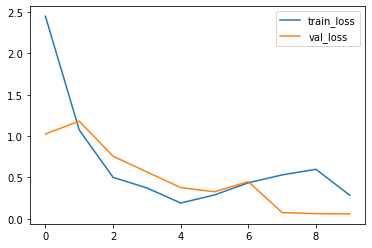

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


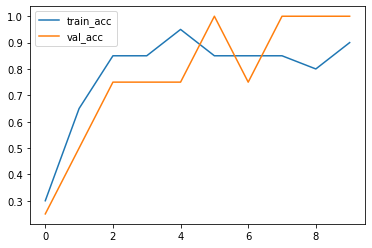

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
from keras.models import load_model

In [ ]:
model.save('vgg16_osteoporosis_model.h5')